In [8]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
pip install seaborn

     -------------------------------------- 288.2/288.2 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 2.2 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     -------------------------------------- 163.6/163.6 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 840.1 kB/s eta 0:00:00
     -------------------------------------- 55.3/55.3 kB 319.3 kB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Users\\Asus\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\matplotlib\\tests\\test_category.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)
  Using cached matplotlib-3.6.0-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached contourpy-1.0.6-cp310-cp310-win_amd64.whl (163 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
pip install nltk

     ---------------------------------------- 1.5/1.5 MB 1.7 MB/s eta 0:00:00
     -------------------------------------- 267.7/267.7 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 96.6/96.6 kB 690.8 kB/s eta 0:00:00
     -------------------------------------- 78.5/78.5 kB 625.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.5/7.5 MB 4.6 MB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
     ---------------------------------------- 40.1/40.1 MB 1.0 MB/s eta 0:00:00
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [33]:
import nltk 
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
stop_words.remove('not')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
 df=pd.read_csv('noida.csv')

In [13]:
df=df[df['content'].str.len()>200]

In [30]:
df.head(10)

,date,content
0,2022-11-01 15:16:29+00:00,@BBCBreaking Police urged to treat Dover attac...
1,2022-11-01 14:53:25+00:00,"@AamAadmiParty Ankit Tyagi, the reporter in vi..."
2,2022-11-01 14:46:52+00:00,@cric_Fadyy @reddysaab__ @SajSadiqCricket Worl...
3,2022-11-01 14:43:15+00:00,Is this the same Ankit Tyagi in this video who...
4,2022-11-01 14:09:15+00:00,Russia considering ‘further steps’ against Bri...
5,2022-11-01 14:03:21+00:00,#CallingSehmat writer #HarinderSikka launches ...
6,2022-11-01 14:03:04+00:00,On 26/11 in a terror attack in #Mumbai 174 wer...
7,2022-11-01 13:53:25+00:00,UK home secretary Suella Braverman under fire ...
8,2022-11-01 13:48:14+00:00,Congress is type sa hi counter attack kare ......
9,2022-11-01 13:36:44+00:00,@whyteknight07 Iski mystery Abhi solve nahi ho...


In [29]:
 df=df.drop('Unnamed: 0',axis=1)

In [34]:
def preprocess_text(text):
    text=text.lower()
    #remove urls
    text=re.sub(r"http\S+|www\S+|https\S+", "",text,flags=re.MULTILINE)
    text=text.translate(str.maketrans("", "",string.punctuation))
    text=re.sub(r'\@\w+|\#', "",text)
    text_tokens=word_tokenize(text)
    fil_words=[word for word in text_tokens if word not in stop_words]
    
    #stemming
    ps=PorterStemmer()
    stem_words=[ps.stem(w) for w in fil_words]
    
    #lemmatizing
    lemmatizer = WordNetLemmatizer()
    lem_words=[lemmatizer.lemmatize(w, pos='a') for w in stem_words]
    
    return " ".join(lem_words)

In [36]:
pip install textblob

     -------------------------------------- 636.8/636.8 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
df['clean']=df['content'].apply(preprocess_text);

In [39]:
from textblob import TextBlob
def sentiment_analysis(tweet):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 tweet['TextBlob_Subjectivity'] = tweet['clean'].apply(getSubjectivity)
 tweet['TextBlob_Polarity'] = tweet['clean'].apply(getPolarity)
 def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
 tweet ['TextBlob_Analysis'] = tweet  ['TextBlob_Polarity'].apply(getAnalysis )
 return tweet

dfnew=sentiment_analysis(df)

In [42]:
dfnew

,date,content,clean,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,2022-11-01 15:16:29+00:00,@BBCBreaking Police urged to treat Dover attac...,bbcbreak polic urg treat dover attack terror,0.000000,0.000000,Neutral
1,2022-11-01 14:53:25+00:00,"@AamAadmiParty Ankit Tyagi, the reporter in vi...",aamaadmiparti ankit tyagi report video kick ti...,0.000000,0.000000,Neutral
2,2022-11-01 14:46:52+00:00,@cric_Fadyy @reddysaab__ @SajSadiqCricket Worl...,cricfadyy reddysaab sajsadiqcricket world best...,0.300000,1.000000,Positive
3,2022-11-01 14:43:15+00:00,Is this the same Ankit Tyagi in this video who...,ankit tyagi video recent fire tnnavbharat rece...,0.250000,0.000000,Neutral
4,2022-11-01 14:09:15+00:00,Russia considering ‘further steps’ against Bri...,russia consid ‘ step ’ britain nord stream ‘ t...,0.000000,0.000000,Neutral
...,...,...,...,...,...,...
995,2022-10-27 15:34:12+00:00,"Prayers for the Islamic Republic of #Iran, it'...",prayer islam republ iran martyr amp injur resu...,0.000000,0.000000,Neutral
996,2022-10-27 15:32:48+00:00,More than 20 people have been killed are 40+ i...,20 peopl kill 40 injur attack shia religi shri...,0.000000,0.000000,Neutral
997,2022-10-27 15:29:32+00:00,The antitrust regulator had on October 20 slap...,antitrust regul octob 20 slap fine ₹133776 cro...,0.250000,0.208333,Positive
998,2022-10-27 15:22:35+00:00,देश के जांबाज को सलाम। भारत मां पर कुर्बान। धन...,देश के जांबाज को सलाम। भारत मां पर कुर्बान। धन...,0.000000,0.000000,Neutral


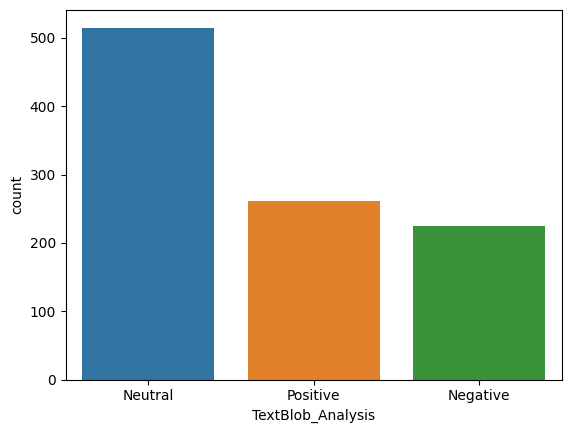

In [50]:
sns.countplot(x=dfnew.TextBlob_Analysis)
plt.show()

In [51]:
def get_n_grams(text,low_n,high_n,top_number):
    
    # create vocabulary
    vec = CountVectorizer(ngram_range=(low_n,high_n)).fit(text)
    B_O_G = vec.transform(text)
    
    # Get words Count
    words_count = B_O_G.sum(axis=0)
    
    # create list of words counts
    word_counts_list = np.array(words_count)[0].tolist()
    
    # create tuple of word and words count
    data = [ (word ,word_counts_list[idx]) for word,idx in vec.vocabulary_.items() ]
    
    # sort words by count descending
    sorted_data = sorted(data,key=lambda x:x[1] ,reverse=True)
    sorted_data = sorted_data[:top_number]
    new_s = []
    for d , n in sorted_data:
        new_s.append([d ,n])
    
    del vec , data ,B_O_G ,words_count,word_counts_list ,sorted_data
    plt.figure(figsize=(10,5))
    sns.barplot(data = pd.DataFrame(new_s,columns=['word','count']),x='word',y='count')
    plt.xticks(rotation=90)
    plt.show()
    
    return pd.DataFrame(new_s,columns=['word','count'])

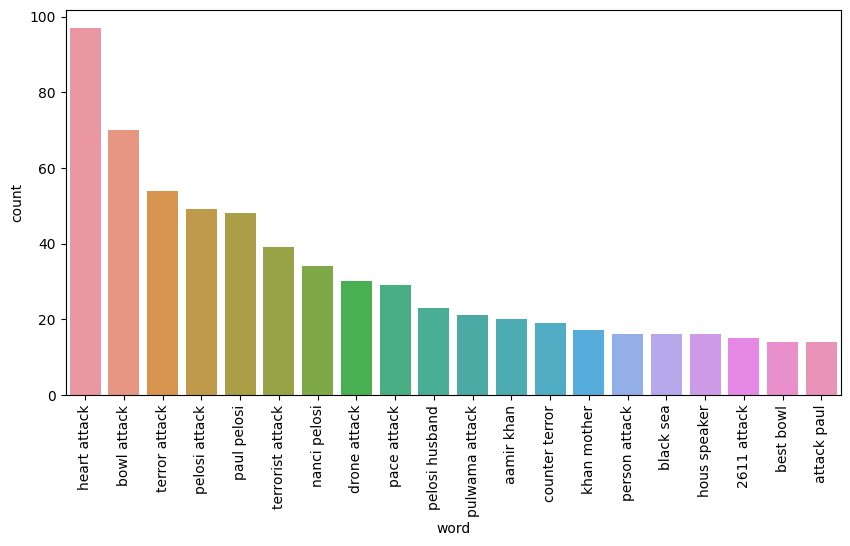

,word,count
0,heart attack,97
1,bowl attack,70
2,terror attack,54
3,pelosi attack,49
4,paul pelosi,48
5,terrorist attack,39
6,nanci pelosi,34
7,drone attack,30
8,pace attack,29
9,pelosi husband,23


In [52]:
get_n_grams(df.clean,2,2,20)